# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output CSV File
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [4]:
#ities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"
# city_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
# city_weather = requests.get(city_url).json()


In [9]:
#city_weather

In [10]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | ocean shores
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | puerto rico
Processing Record 8 of Set 1 | ash shafa
City not found. Skipping...
Processing Record 9 of Set 1 | matoury
Processing Record 10 of Set 1 | zhezqazghan
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | fort st. john
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | nurota
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | sur
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | sipalay
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 

Processing Record 37 of Set 4 | st. john's
Processing Record 38 of Set 4 | pandeglang
Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | punta arenas
Processing Record 41 of Set 4 | lafiagi
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | seven pagodas
Processing Record 45 of Set 4 | puerto leguizamo
Processing Record 46 of Set 4 | port augusta
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | lewistown
Processing Record 49 of Set 4 | luderitz
Processing Record 0 of Set 5 | port lincoln
Processing Record 1 of Set 5 | newman
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | happy valley-goose bay
Processing Record 5 of Set 5 | afaahiti
Processing Record 6 of Set 5 | prachuap khiri khan
Processing Record 7 of Set 5 | sao jose da coroa grande
Processing Record 8 of Set 5 | fisterra
Processing Record 9 of Set 5 |

Processing Record 29 of Set 8 | haiku-pauwela
Processing Record 30 of Set 8 | dawei
Processing Record 31 of Set 8 | ocos
Processing Record 32 of Set 8 | inekar
City not found. Skipping...
Processing Record 33 of Set 8 | muroto-misakicho
Processing Record 34 of Set 8 | orchard homes
Processing Record 35 of Set 8 | atbasar
Processing Record 36 of Set 8 | marquette
Processing Record 37 of Set 8 | oyem
Processing Record 38 of Set 8 | thinadhoo
Processing Record 39 of Set 8 | pitimbu
Processing Record 40 of Set 8 | buala
Processing Record 41 of Set 8 | minas de marcona
Processing Record 42 of Set 8 | dzhalagash
Processing Record 43 of Set 8 | khandyga
Processing Record 44 of Set 8 | trail
Processing Record 45 of Set 8 | gobabis
Processing Record 46 of Set 8 | turtas
Processing Record 47 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 48 of Set 8 | salinas de hidalgo
Processing Record 49 of Set 8 | poxoreo
Processing Record 0 of Set 9 | paradip garh
Processing Record

Processing Record 21 of Set 12 | coahuayana de hidalgo
Processing Record 22 of Set 12 | aksu
Processing Record 23 of Set 12 | salekhard
Processing Record 24 of Set 12 | port hedland
Processing Record 25 of Set 12 | stornoway
Processing Record 26 of Set 12 | ghormach
Processing Record 27 of Set 12 | tromso
Processing Record 28 of Set 12 | pandan
Processing Record 29 of Set 12 | alpu
Processing Record 30 of Set 12 | ketchikan
Processing Record 31 of Set 12 | bytow
Processing Record 32 of Set 12 | lamu
Processing Record 33 of Set 12 | guacamayas
Processing Record 34 of Set 12 | farshut
Processing Record 35 of Set 12 | hassi messaoud
Processing Record 36 of Set 12 | frontera
Processing Record 37 of Set 12 | pantai remis
Processing Record 38 of Set 12 | morehead city
Processing Record 39 of Set 12 | viligili
City not found. Skipping...
Processing Record 40 of Set 12 | hammerfest
Processing Record 41 of Set 12 | antsiranana
Processing Record 42 of Set 12 | hirara
Processing Record 43 of Set 

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,76.77,73,40,4.00,PT,1691338418
1,waitangi,-43.9535,-176.5597,43.83,64,75,11.70,NZ,1691338122
2,udachny,66.4167,112.4000,53.46,66,53,9.08,RU,1691338419
3,ocean shores,46.9737,-124.1563,64.96,97,100,5.75,US,1691338419
4,port-aux-francais,-49.3500,70.2167,40.30,90,93,29.89,TF,1691338419


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,76.77,73,40,4.00,PT,1691338418
1,waitangi,-43.9535,-176.5597,43.83,64,75,11.70,NZ,1691338122
2,udachny,66.4167,112.4000,53.46,66,53,9.08,RU,1691338419
3,ocean shores,46.9737,-124.1563,64.96,97,100,5.75,US,1691338419
4,port-aux-francais,-49.3500,70.2167,40.30,90,93,29.89,TF,1691338419


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

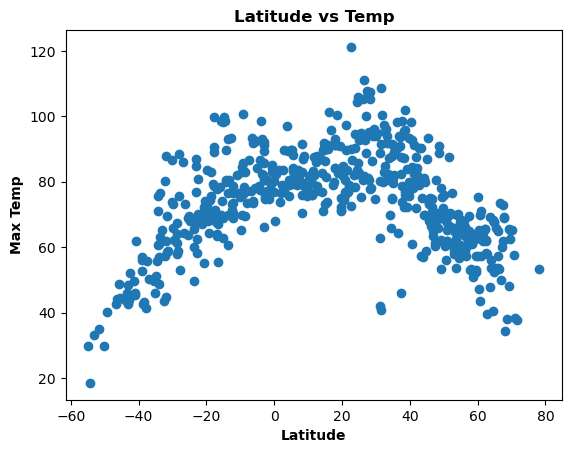

In [57]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Max Temp", fontweight="bold")
plt.title("Latitude vs Temp", fontweight="bold")

# Save the figure

plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

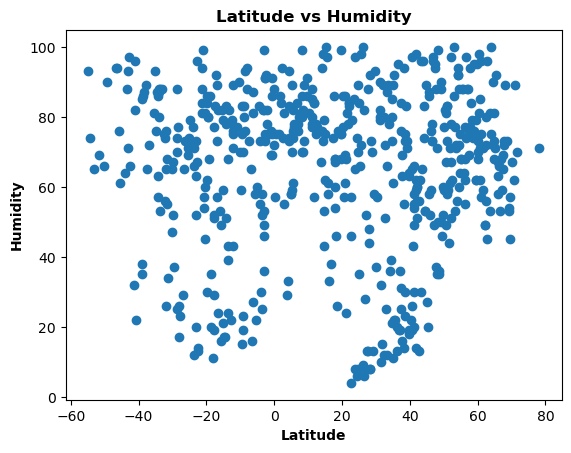

In [60]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Humidity", fontweight="bold")
plt.title("Latitude vs Humidity", fontweight="bold")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

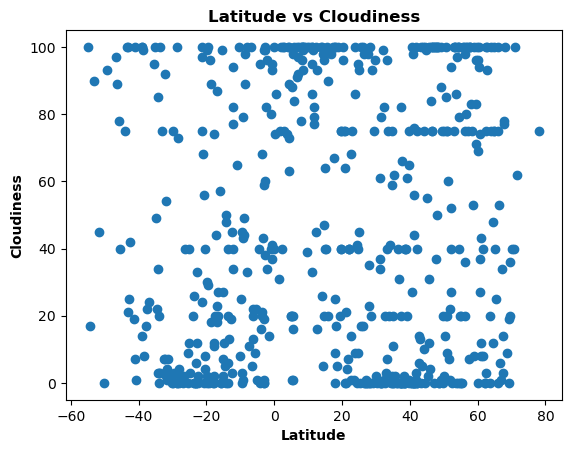

In [63]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Cloudiness", fontweight="bold")
plt.title("Latitude vs Cloudiness", fontweight="bold")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

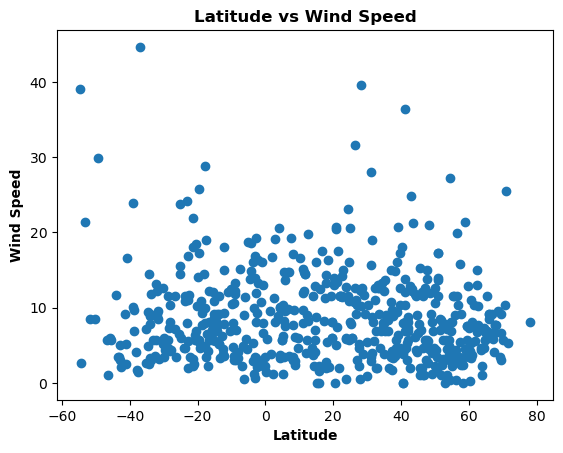

In [65]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Wind Speed", fontweight="bold")
plt.title("Latitude vs Wind Speed", fontweight="bold")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [78]:
# city_data_df.head()

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,76.77,73,40,4.00,PT,1691338418
2,udachny,66.4167,112.4000,53.46,66,53,9.08,RU,1691338419
3,ocean shores,46.9737,-124.1563,64.96,97,100,5.75,US,1691338419
7,matoury,4.8483,-52.3317,89.56,58,20,5.75,GF,1691338420
8,zhezqazghan,47.7833,67.7667,80.58,37,37,13.78,KZ,1691338420


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,43.83,64,75,11.70,NZ,1691338122
4,port-aux-francais,-49.3500,70.2167,40.30,90,93,29.89,TF,1691338419
5,papatowai,-46.5619,169.4708,42.78,94,97,5.64,NZ,1691338419
6,puerto rico,-26.7960,-55.0240,85.96,29,0,7.14,AR,1691338077
9,grytviken,-54.2811,-36.5092,18.52,74,17,2.71,GS,1691338420


###  Temperature vs. Latitude Linear Regression Plot

In [86]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -0.47x + 93.35'

The correlation coefficient is: -0.63


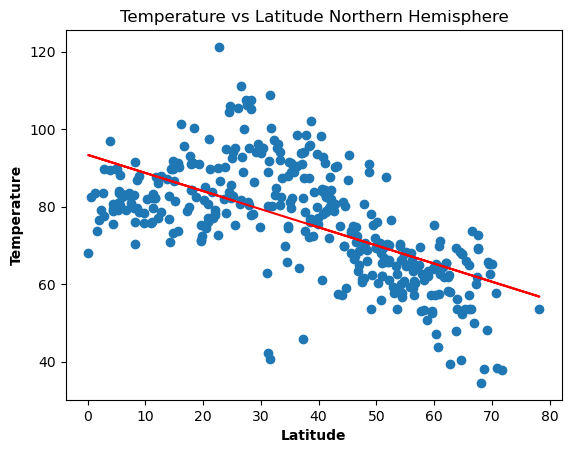

In [108]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
import scipy.stats as st

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
north_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, north_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Temperature", fontweight="bold")
plt.title("Temperature vs Latitude Northern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()
           


The correlation coefficient is: 0.77


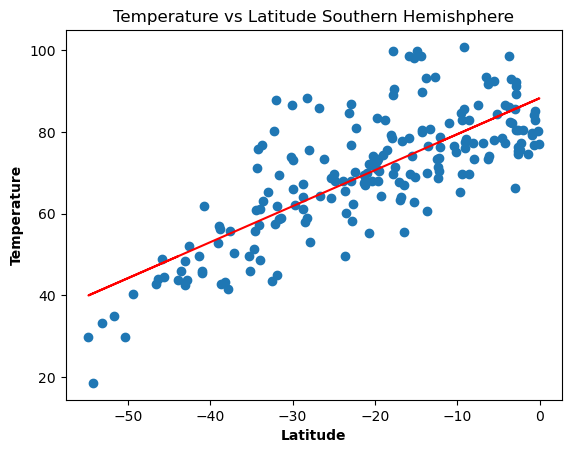

In [110]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
south_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, south_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Temperature", fontweight="bold")
plt.title("Temperature vs Latitude Southern Hemishphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()
           
# south_regress_values

**Discussion about the linear relationship:** 

- There is a negative correlation of -0.63 between Latitude and Temperature in the Southern hemisphere. Meaning the farther north you travel away from Latitude 0, the lower the temperature will be.

- There is a strong positive correlation of 0.77 between Latitude and Temperature in the Southern hemisphere. Meaning the closer you get to the equator, the higher the temperature will be.

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.01


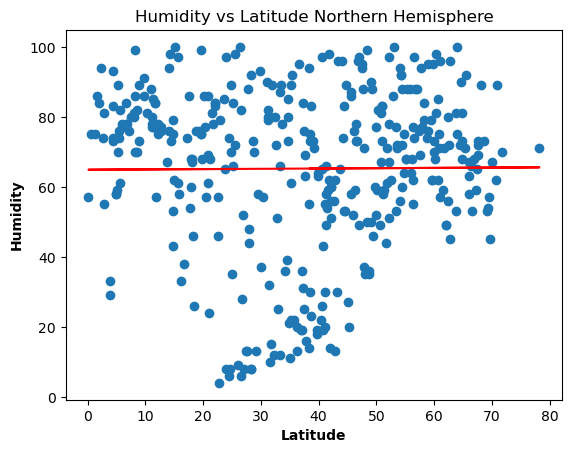

In [111]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
north_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, north_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Humidity", fontweight="bold")
plt.title("Humidity vs Latitude Northern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()
           

The correlation coefficient is: -0.08


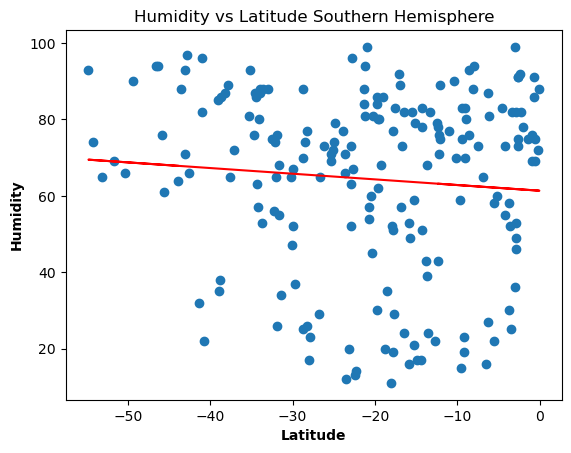

In [112]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
south_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, south_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Humidity", fontweight="bold")
plt.title("Humidity vs Latitude Southern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()

**Discussion about the linear relationship:** 

- Looking at the correlation coefficient numbers for both the Northern and Southern Hemisphere's, you can see they are very near zero. Meaning there is little evidence that latitude effects humidity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient is: -0.11


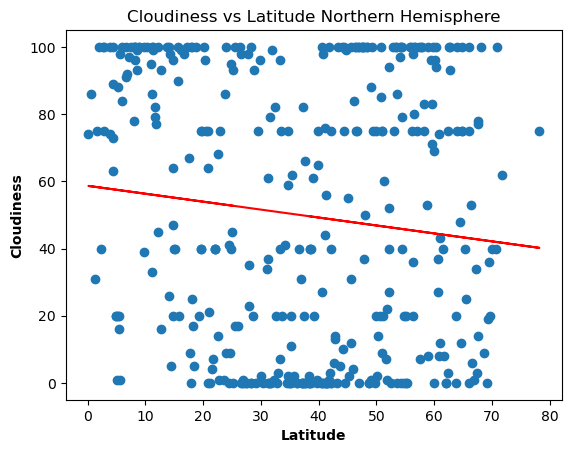

In [113]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
north_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, north_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Cloudiness", fontweight="bold")
plt.title("Cloudiness vs Latitude Northern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()

The correlation coefficient is: -0.01


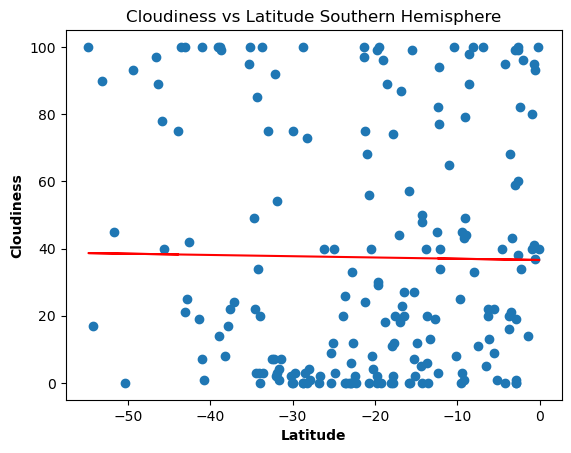

In [114]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
south_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, south_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Cloudiness", fontweight="bold")
plt.title("Cloudiness vs Latitude Southern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()

**Discussion about the linear relationship:** 

- Looking at the Linear Regression line it is very obvious there is little correllation between cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

In [115]:
north_hemi_df.keys()

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

The correlation coefficient is: -0.12


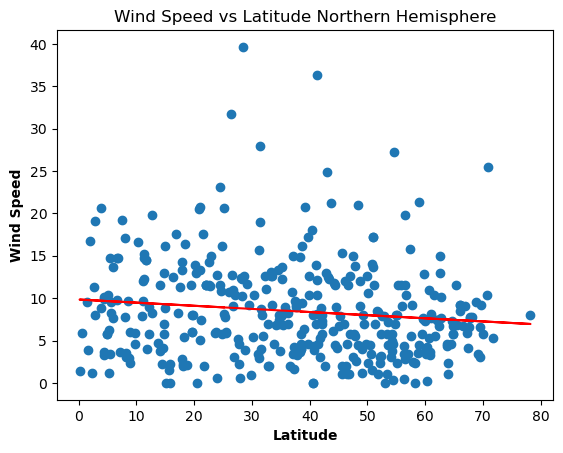

In [117]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
north_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, north_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Wind Speed", fontweight="bold")
plt.title("Wind Speed vs Latitude Northern Hemisphere")
plt.annotate(line_eq, (100,10), fontsize=12, color="red")

plt.show()

The correlation coefficient is: -0.07


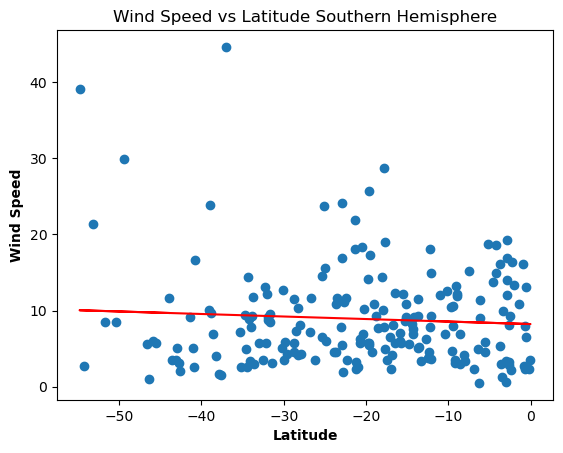

In [119]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values, y_values)[0],2)
south_regress_values = x_values * slope + intercept
print(f"The correlation coefficient is: {correlation}")
# Create LinRegress Plot

plt.scatter(x_values, y_values)
plt.plot(x_values, south_regress_values, "r-")
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel("Wind Speed", fontweight="bold")
plt.title("Wind Speed vs Latitude Southern Hemisphere")
plt.annotate(line_eq, (0, 100), fontsize=12, color="red")

plt.show()

**Discussion about the linear relationship:** 

- With Correlation Coefficient numbers both near zero, there is almost no correltion betwee Wind Speed and Latitude.